<a href="https://colab.research.google.com/github/sakira/TensorflowInPractice/blob/master/DNN_in_tensorflow_Course_1_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!wget --no-check-certificate\
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
  -O /tmp/horse-or-human.zip

--2019-12-05 22:38:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   103MB/s    in 1.4s    

2019-12-05 22:38:01 (103 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
# Directory with training horse images
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with training human images
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [8]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse29-5.png', 'horse14-0.png', 'horse05-1.png', 'horse38-0.png', 'horse02-7.png', 'horse30-4.png', 'horse15-2.png', 'horse43-6.png', 'horse39-7.png', 'horse43-8.png']
['human01-28.png', 'human05-10.png', 'human14-27.png', 'human07-26.png', 'human15-11.png', 'human12-30.png', 'human04-24.png', 'human03-18.png', 'human07-20.png', 'human12-08.png']


In [9]:
print('Total training horse images: {}'.format(len(os.listdir(train_horse_dir))))
print('Total training human images: {}'.format(len(os.listdir(train_human_dir))))

Total training horse images: 500
Total training human images: 527


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for graph
nrows = 4
ncols = 4


# index for iterting over images
pic_index = 0


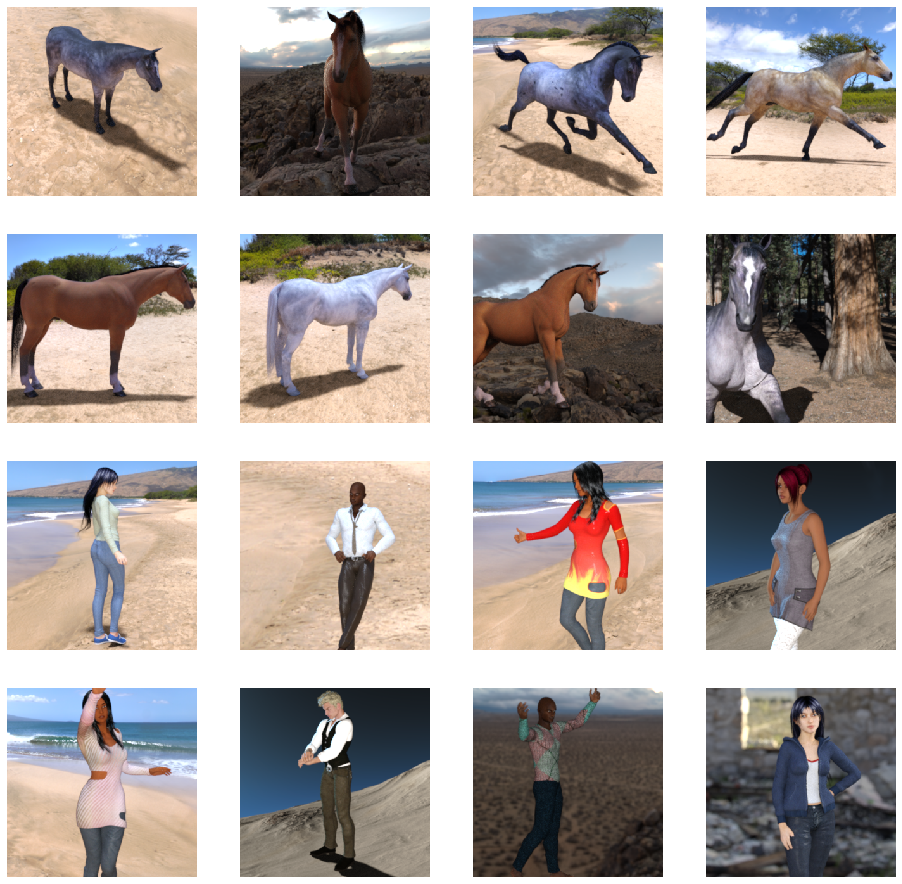

In [11]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]

next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Image generator

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
ls /tmp/

horse-or-human/  horse-or-human.zip


In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_dir = '/tmp/horse-or-human/'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

In [3]:
model = tf.keras.models.Sequential([
                                    # 3 sets of conv and pooling layers
                                    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    # dense layers
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________

## Training the convNet with fit_generator

In [0]:
from tensorflow.keras.optimizers import RMSprop

In [5]:
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=0.001),
    metrics=['acc']
              )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    #validation_data=validation_generator,
    #validation_steps=8,
    verbose=2
)

Epoch 1/15
8/8 - 89s - loss: 0.9365 - acc: 0.5172
Epoch 2/15
8/8 - 97s - loss: 0.7654 - acc: 0.5928
Epoch 3/15


In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [0]:
uploaded = files.uploaded()

In [0]:
for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + ' is a human')
  else:
    print(fn + ' is a horse')